In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy import sqrt as rt

i 1 :
dx = 2
-a/2 - sqrt(-(a - 4)*(3*a - 4))/2 -a/2 + sqrt(-(a - 4)*(3*a - 4))/2
[4/3, 4]
x = 2 , y = 0 , value = 0
dy = -1
-a/2 - sqrt(-(a - 2)*(3*a - 10))/2 -a/2 + sqrt(-(a - 2)*(3*a - 10))/2
[2, 10/3]
x = 2 , y = -1 , value = -1
i 2 :
dx = 1/2
-a/2 - sqrt(-(a - 3)*(3*a - 7))/2 -a/2 + sqrt(-(a - 3)*(3*a - 7))/2
[7/3, 3]
x = 5/2 , y = -1 , value = -5/4
dy = -1/4
-a/2 - sqrt(-12*a**2 + 64*a - 85)/4 -a/2 + sqrt(-12*a**2 + 64*a - 85)/4
[5/2, 17/6]
x = 5/2 , y = -5/4 , value = -21/16
i 3 :
dx = 1/8
-a/2 - sqrt(-48*a**2 + 256*a - 341)/8 -a/2 + sqrt(-48*a**2 + 256*a - 341)/8
[31/12, 11/4]
x = 21/8 , y = -5/4 , value = -85/64
dy = -1/16
-a/2 - sqrt(-192*a**2 + 1024*a - 1365)/16 -a/2 + sqrt(-192*a**2 + 1024*a - 1365)/16
[21/8, 65/24]
x = 21/8 , y = -21/16 , value = -341/256
i 4 :
dx = 1/32
x = 21/8 , y = -21/16 , value = -341/256


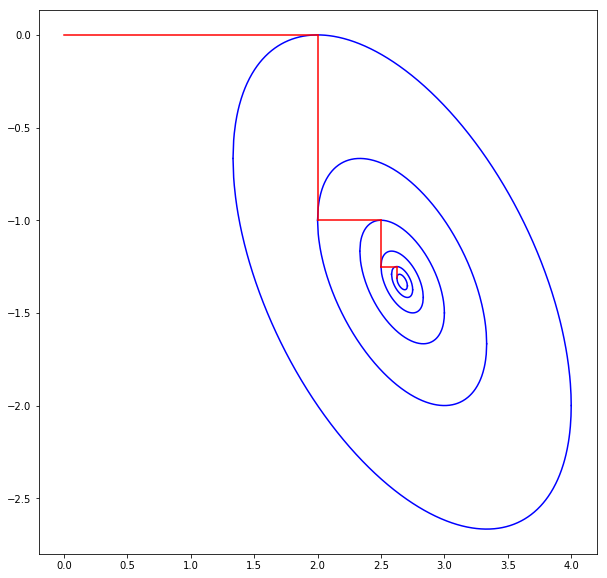

In [11]:
plt.figure(figsize = (10,10))
x, y, dx, dy, a, b = symbols('x y dx dy a b')
f = (x-2)**2+y**2+x*y # Исходная функция
fdx = (x+dx-2)**2+y**2+(x+dx)*y # Функция с приращением по x
f_dx = fdx.diff(dx) # Производная по приращению x
fdy = (x-2)**2+(y+dy)**2+(y+dy)*x # Функция с приращением по y
f_dy = fdy.diff(dy) # Производная по приращению y
e = 0.05 # Точность
f_value = lambdify([x, y], f) # Для подсчёта значений заданных функций
f_dx_value = lambdify([x, y], f_dx)
f_dy_value = lambdify([x, y], f_dy)
x = 0 # Начальные координаты
y = 0
old_x = x # "старые" координаты (для отображения линий спуска)
old_y = y
v = f_value(x, y) # значение функции в x, y
i = 1 # Номер итерации

def plot(old_x, old_y, x, y, v):
    b1 = solve(Eq((a-2)**2+b**2+a*b, v), b)[0] # Выражение функции f через y, -sqrt
    b2 = solve(Eq((a-2)**2+b**2+a*b, v), b)[1] # ...+sqrt
    print(b1, b2)
    f1 = Lambda(a, b1) # Для подсчёта значений b1
    f2 = Lambda(a, b2) # ...b2
    s = solve(Eq(b1, b2), a) # Граничные значения x
    print(s)
    if (len(s) > 1):
        r = np.arange(s[0], s[1], 0.005) # Значения х от левого граничного до правого (не включая)
        r = np.append(r, s[1]) # Включение правой границы
        t1 = []
        t2 = []
        for i in range(len(r)):
            t1 = np.append(t1, f1(r[i])) # Значения y(x), -sqrt
            t2 = np.append(t2, f2(r[i])) # ...+sqrt
    else:
        r = s[0]
        t1 = f1(r)
        t2 = f2(r)
    plt.plot(r, t1, 'b') # Половина графика y(x), -sqrt
    plt.plot(r, t2, 'b') #...+sqrt
    plt.plot([old_x, x], [old_y, y], 'r') # Линия спуска
    
while(True):
    print("i", i, ":")
    dx_value = solve(Eq(f_dx_value(x, y), 0), dx)[0] # Минимизируем f_dx
    print("dx =", dx_value)
    if (abs(dx_value) < e): # Проверка останова (если смещение по x меньше заданного)
        break
    x += dx_value
    v = f_value(x, y) # Новое значение f(x, y)
    plot(old_x, old_y, x, y, v) # Отрисовка графика
    print("x =", x, ", y =", y, ", value =", v)
    old_x = x
    dy_value = solve(Eq(f_dy_value(x, y), 0), dy)[0] # Минимизируем f_dy
    print("dy =", dy_value)
    if (abs(dy_value) < e):
        break
    y += dy_value
    v = f_value(x, y)
    plot(old_x, old_y, x, y, v)
    print("x =", x, ", y =", y, ", value =", v)
    old_y = y
    i+=1
print("x =", x, ", y =", y, ", value =", v)

[-1.3125     -1.34095208 -1.35332207 -1.36214102 -1.36855551 -1.37285534
 -1.3749037  -1.37395751 -1.36664214 -1.35416667] [-1.3125     -1.29404792 -1.29167793 -1.29285898 -1.29644449 -1.30214466
 -1.3100963  -1.32104249 -1.33835786 -1.35416667] [2.625      2.635      2.645      2.655      2.665      2.675
 2.685      2.695      2.705      2.70833333]


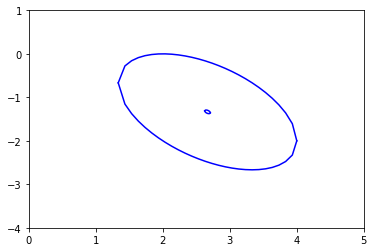

In [275]:
x = np.arange(4/3, 4, 0.1)
x = np.append(x, 4)
y = 1/2*((-3*x**2+16*x-16)**(1/2) - x)
z = 1/2*(-(-3*x**2+16*x-16)**(1/2) - x)
plt.xlim(0, 5)
plt.ylim(-4, 1)
plt.plot(x,y, 'b')
plt.plot(x,z, 'b')
x = np.arange(21/8, 65/24, 0.01)
x = np.append(x, 65/24)
y = -x/2 - (-192*x**2 + 1024*x - 1365)**(1/2)/16
z = -x/2 + (-192*x**2 + 1024*x - 1365)**(1/2)/16
plt.plot(x,y, 'b')
plt.plot(x,z, 'b')
print(y, z, x)